In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup




In [2]:
URL = ["https://www.imdb.com/search/title/?genres=action&explore=title_type,genres&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e0da8c98-35e8-4ebd-8e86-e7d39c92730c&pf_rd_r=NCWR107JR3D070SM7GBG&pf_rd_s=center-2&pf_rd_t=15051&pf_rd_i=genre&ref_=ft_gnr_pr2_i_2",
                "https://www.imdb.com/search/title/?genres=action&start=51&explore=title_type,genres&ref_=adv_nxt"]
  


In [3]:
# Creating the lists that we want to 
description =[]
duration=[]
release_date=[]
movie_director_stars=[]
movie_year=[]
director_sep = []
stars_sep = []
rating = []
genre=[]

votes=[]


movie_name_100=[]

for url in range(0,2):
    req = requests.get(URL[url])
    soup = BeautifulSoup(req.text, 'html.parser')
    for container in soup.find_all("h3" ,class_="lister-item-header"):
        movie_name_100.append(container.text.replace('\n', '').strip(')').split('(')[0].split('.')[1])
        movie_year.append(container.text.replace('\n', '').strip(')').split('(')[1].split('–')[0]) 
    
    # for release in soup.find_all('span', class_="runtime"):
    #     duration.append(release.text) 

    
    for dist in soup.select('.text-muted+ .text-muted , .ratings-bar+ .text-muted'):
        description.append(dist.text.replace('\n', ''))

    for director in soup.find_all('p', class_ =''):
        director_sep.append(director.text.replace("\n", "").split('|')[0].split(':')[1].split(',')[0])
        stars_sep.append(director.text.replace("\n",'').split('Stars:')[1])

    # for years in soup.find_all('span', class_ ='lister-item-year'):
    #     movie_years.append(years.text)
    
    
    for elements in soup.select('.lister-item-content'):
        extract_rating=pd.Series(elements.text.replace('\n', '')).str.extract(r'(\d\.\d)Rate this')
        rating.append(float(extract_rating.squeeze()))
        dura=pd.Series(elements.text.replace('\n','')).str.extract(r'(\d+) min').squeeze()
        duration.append(dura)


    for genres in soup.find_all('span', class_ = 'genre'):
        genre.append(genres.text.replace('\n','').strip())

    for vote in soup.find_all('div', class_='lister-item-content'):
        extract_vote=pd.Series(vote.text.replace('\n','')).str.extract(r'Votes:(\d+,?\d+)').squeeze()
        
        if isinstance(extract_vote, str):
            votes.append(int(extract_vote.replace(',','')))
        else:
            votes.append(extract_vote)
print(len(genre))

100


In [4]:
df=pd.DataFrame({'Title':  movie_name_100, 'Description':description, 'Release':movie_year , 
                        'Director': director_sep, 
                        'Rating': rating, 'Duration':duration, 'Votes': votes,
                        'Genre':genre, 'Stars': stars_sep, })

df[:6]

,Title,Description,Release,Director,Rating,Duration,Votes,Genre,Stars
0,The Batman,"When the Riddler, a sadistic serial killer, be...",2022,Matt Reeves,8.4,176,255492.0,"Action, Crime, Drama","Robert Pattinson, Zoë Kravitz, Jeffrey Wright,..."
1,The Adam Project,"""After accidentally crash-landing in 2022, tim...",2022,Shawn Levy,6.8,106,75417.0,"Action, Adventure, Comedy","Ryan Reynolds, Walker Scobell, Mark Ruffalo, J..."
2,The Last Kingdom,As Alfred the Great defends his kingdom from N...,2015,Alexander Dreymon,8.5,60,114476.0,"Action, Drama, History","Alexander Dreymon, Eliza Butterworth, Arnas Fe..."
3,Obi-Wan Kenobi,Jedi Master Obi-Wan Kenobi watches over young ...,2022,Rupert Friend,NaN,NaN,NaN,"Action, Adventure, Sci-Fi","Rupert Friend, Hayden Christensen, Ewan McGreg..."
4,Vikings: Valhalla,Follow-up series to 'Vikings' set 100 years af...,2022,Sam Corlett,7.1,51,23229.0,"Action, Adventure, Drama","Sam Corlett, Leo Suter, Jóhannes Haukur Jóhann..."
5,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021,Jon Watts,8.6,148,534028.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja..."


In [18]:
df.to_csv('data_imdb_action.csv', index=False)

In [5]:
df['Rating'].mean()

7.43411764705882

In [6]:
df["Director"].value_counts()

Christopher Nolan    5
Matthew Vaughn       3
Patrick Stewart      2
Zack Snyder          2
Shawn Levy           2
                    ..
Justin Lin           1
Daniel Espinosa      1
Karl Urban           1
Chloé Zhao           1
Jeremy Renner        1
Name: Director, Length: 89, dtype: int64

In [7]:
df.describe()

,Rating,Votes
count,85.000000,84.000000
mean,7.434118,165077.607143
std,1.253904,173932.596418
min,3.400000,274.000000
25%,6.900000,22710.500000
50%,7.600000,104353.000000
75%,8.400000,281036.750000
max,9.300000,795986.000000


In [8]:
actors = df.Stars.str.split(',')

actors_name = []
for i in actors:
    for j in i:
        actors_name.append(j.replace("'", ' ').strip('[ ]'))
print(actors_name)     


['Robert Pattinson', 'Zoë Kravitz', 'Jeffrey Wright', 'Colin Farrell', 'Ryan Reynolds', 'Walker Scobell', 'Mark Ruffalo', 'Jennifer Garner', 'Alexander Dreymon', 'Eliza Butterworth', 'Arnas Fedaravicius', 'Mark Rowley', 'Rupert Friend', 'Hayden Christensen', 'Ewan McGregor', 'Joel Edgerton', 'Sam Corlett', 'Leo Suter', 'Jóhannes Haukur Jóhannesson', 'Lujza Richter', 'Tom Holland', 'Zendaya', 'Benedict Cumberbatch', 'Jacob Batalon', 'Rhys Darby', 'Joel Fry', 'Samson Kayo', 'Nathan Foad', 'Ralph Fiennes', 'Gemma Arterton', 'Rhys Ifans', 'Harris Dickinson', 'Yûki Kaji', 'Yui Ishikawa', 'Marina Inoue', 'Josh Grelle', 'Zazie Beetz', 'Brad Pitt', 'Aaron Taylor-Johnson', 'Sandra Bullock', 'Alan Ritchson', 'Malcolm Goodwin', 'Willa Fitzgerald', 'Hugh Thompson', 'Christian Bale', 'Heath Ledger', 'Aaron Eckhart', 'Michael Caine', 'Patrick Stewart', 'Alison Pill', 'Michelle Hurd', 'Santiago Cabrera', 'Tom Holland', 'Mark Wahlberg', 'Antonio Banderas', 'Sophia Ali', 'Katheryn Winnick', 'Gustaf Ska

In [9]:
df1 = pd.DataFrame(actors_name)
df1.value_counts()

Michael Keaton       5
Christian Bale       4
Henry Cavill         3
Samuel L. Jackson    3
Patrick Stewart      3
                    ..
Freya Allan          1
Freddie Stroma       1
Frank Trigg          1
Frank Grillo         1
Úrsula Corberó       1
Length: 359, dtype: int64

In [22]:
#We have our top 3 movies/tv shows by rating

df.sort_values(by=['Rating'], ascending = False, inplace = True)
df

,Title,Description,Release,Director,Rating,Duration,Votes,Genre,Stars
15,Il trono di spade,Nine noble families fight for control over the...,2011,Emilia Clarke,9.3,57,1965.0,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ..."
96,Il talento di Mr,A cash-strapped Nicolas Cage agrees to make a ...,2022,Tom Gormican,9.3,105,274.0,"Action, Comedy, Crime","Nicolas Cage, Jacob Scipio, Pedro Pascal, Demi..."
58,Arcane,Set in utopian Piltover and the oppressed unde...,2021,Hailee Steinfeld,9.1,41,165195.0,"Animation, Action, Adventure","Hailee Steinfeld, Kevin Alejandro, Jason Spisa..."
8,L'attacco dei giganti,Fueled by the death of his mother at the hands...,2013,Yûki Kaji,9.1,24,332902.0,"Animation, Action, Adventure","Yûki Kaji, Yui Ishikawa, Marina Inoue, Josh Gr..."
11,Il cavaliere oscuro,When the menace known as the Joker wreaks havo...,2008,Christopher Nolan,9.1,152,2523.0,"Action, Crime, Drama","Christian Bale, Heath Ledger, Aaron Eckhart, M..."
...,...,...,...,...,...,...,...,...,...
81,The Northman,From visionary director Robert Eggers comes Th...,2022,Robert Eggers,NaN,NaN,NaN,"Action, Adventure, Drama","Alexander Skarsgård, Nicole Kidman, Claes Bang..."
89,Avatar 2,Jake Sully lives with his newfound family form...,2022,James Cameron,NaN,NaN,NaN,"Action, Adventure, Sci-Fi","Zoe Saldana, Kate Winslet, Michelle Yeoh, Sigo..."
90,The Flash,The plot is unknown. Feature film based on the...,2023,Andy Muschietti,NaN,NaN,NaN,"Action, Adventure, Fantasy","Ben Affleck, Michael Keaton, Ezra Miller, Temu..."
91,Argylle,World's greatest spy 'Argylle' as he is caught...,2022,Matthew Vaughn,NaN,NaN,NaN,Action,"Ariana DeBose, Henry Cavill, Samuel L. Jackson..."


In [23]:
# In this case sorted by Votes.

df.sort_values(by=['Votes'], ascending = False, inplace = True)
df

,Title,Description,Release,Director,Rating,Duration,Votes,Genre,Stars
78,300,King Leonidas of Sparta and a force of 300 men...,2006,Zack Snyder,7.6,117,795986.0,"Action, Drama","Gerard Butler, Lena Headey, David Wenham, Domi..."
63,Kingsman: Secret Service,A spy organisation recruits a promising street...,2014,Matthew Vaughn,7.7,129,646512.0,"Action, Adventure, Comedy","Colin Firth, Taron Egerton, Samuel L. Jackson,..."
5,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",2021,Jon Watts,8.6,148,534028.0,"Action, Adventure, Fantasy","Tom Holland, Zendaya, Benedict Cumberbatch, Ja..."
18,Dune,Feature adaptation of Frank Herbert's science ...,2021,Denis Villeneuve,8.1,155,516036.0,"Action, Adventure, Drama","Timothée Chalamet, Rebecca Ferguson, Zendaya, ..."
14,Vikings,Vikings transports us to the brutal and myster...,2013,Katheryn Winnick,8.6,44,500235.0,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ..."
...,...,...,...,...,...,...,...,...,...
81,The Northman,From visionary director Robert Eggers comes Th...,2022,Robert Eggers,NaN,NaN,NaN,"Action, Adventure, Drama","Alexander Skarsgård, Nicole Kidman, Claes Bang..."
89,Avatar 2,Jake Sully lives with his newfound family form...,2022,James Cameron,NaN,NaN,NaN,"Action, Adventure, Sci-Fi","Zoe Saldana, Kate Winslet, Michelle Yeoh, Sigo..."
90,The Flash,The plot is unknown. Feature film based on the...,2023,Andy Muschietti,NaN,NaN,NaN,"Action, Adventure, Fantasy","Ben Affleck, Michael Keaton, Ezra Miller, Temu..."
91,Argylle,World's greatest spy 'Argylle' as he is caught...,2022,Matthew Vaughn,NaN,NaN,NaN,Action,"Ariana DeBose, Henry Cavill, Samuel L. Jackson..."


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(Michael Keaton,)'),
  Text(1, 0, '(Christian Bale,)'),
  Text(2, 0, '(Henry Cavill,)'),
  Text(3, 0, '(Samuel L. Jackson,)'),
  Text(4, 0, '(Patrick Stewart,)')])

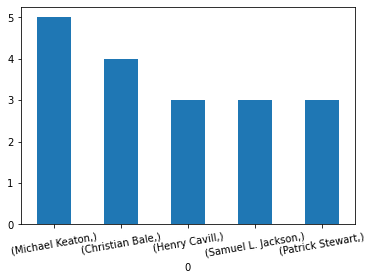

In [10]:
df1.value_counts().nlargest(5).plot(kind = 'bar')
plt.xticks(rotation = 10)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Christopher Nolan'),
  Text(1, 0, 'Matthew Vaughn'),
  Text(2, 0, 'Patrick Stewart'),
  Text(3, 0, 'Zack Snyder'),
  Text(4, 0, 'Shawn Levy')])

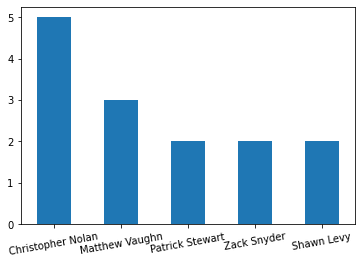

In [11]:
df['Director'].value_counts().nlargest(5).plot(kind = 'bar')
plt.xticks(rotation = 10)

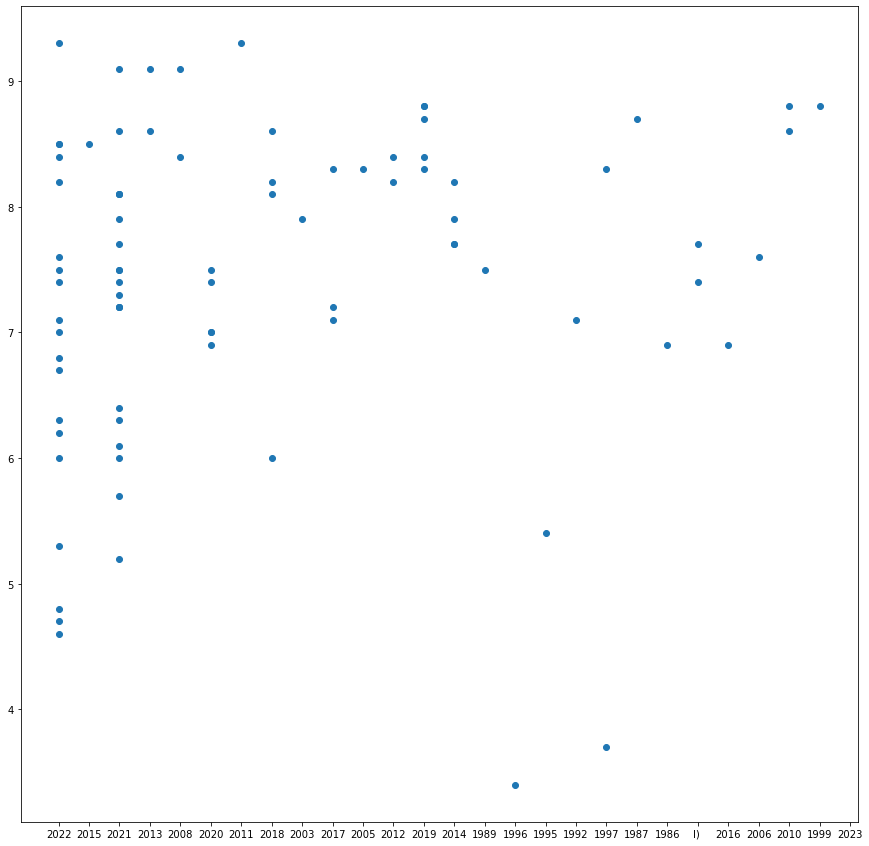

In [17]:
ig, ax = plt.subplots(figsize=(15,15))
plt.scatter(df['Release'], df['Rating'])
# plt.xticks([1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2022])
plt.show()

In [13]:
#   normalized_df=(df-df.mean())/df.std()

#   normalized_df=(df-df.min())/(df.max()-df.min())
